<a href="https://colab.research.google.com/github/AkshayJS/Computer-Vision-Projects/blob/main/1_CNN_Architectures_with_MNIST%2C_CIFAR_and_Flowers_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Assignment consists of 
1. 5 tryouts of CNN architectures on MSIST dataset.
2. 5 tryouts of CNN architectures on CIFAR-10 dataset.
3. 1 CNN+ANN architecture on Flower dataset.

#### MNSIT Dataset with 5 architectures


11501568/11490434 [==============================] - 0s 0us/step
The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


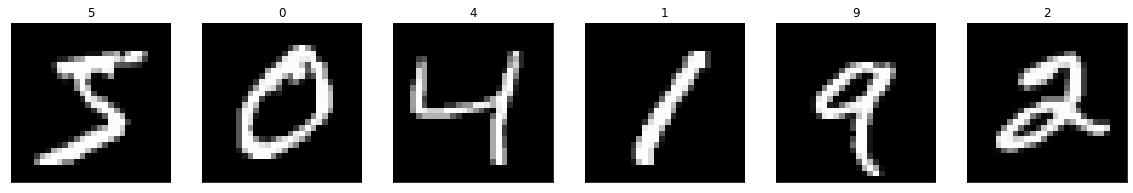

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### Architecture 1

Layers:
1. 2x Conv Layers (32 filters)
2. Maxpooling = (2,2)
3. 2x Conv Layers (64 filters)
4. Maxpooling = (2,2)
5. Conv Layer (128 filters)
6. Conv Layer (10 filters)

Loss = Catergorical cross-entropy

Optimizer = adam


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(10,kernel_size=(2,2),padding='valid',activation='sigmoid'))

model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)         7

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/10
938/938 - 42s - loss: 0.1676 - accuracy: 0.9500 - val_loss: 0.0480 - val_accuracy: 0.9855

Epoch 00001: val_loss improved from inf to 0.04798, saving model to model.weights.best.hdf5
Epoch 2/10
938/938 - 9s - loss: 0.0463 - accuracy: 0.9862 - val_loss: 0.0299 - val_accuracy: 0.9895

Epoch 00002: val_loss improved from 0.04798 to 0.02987, saving model to model.weights.best.hdf5
Epoch 3/10
938/938 - 9s - loss: 0.0323 - accuracy: 0.9905 - val_loss: 0.0343 - val_accuracy: 0.9903

Epoch 00003: val_loss did not improve from 0.02987
Epoch 4/10
938/938 - 9s - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0232 - val_accuracy: 0.9922

Epoch 00004: val_loss improved from 0.02987 to 0.02315, saving model to model.weights.best.hdf5
Epoch 5/10
938/938 - 9s - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0340 - val_accuracy: 0.9897

Epoch 00005: val_loss did not improve from 0.02315
Epoch 6/10
938/938 - 9s - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.0240 - val_accuracy: 0.9928

Epoch 0

In [ ]:
model.load_weights("model.weights.best.hdf5")
_, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Model Accuracy: {acc*100:.4f}%')

Model Accuracy: 99.2200%


### Architecture 2:

Layers:
1. 2x Conv Layers (32 filters)
2. Maxpooling = (2,2)
3. 2x Conv Layers (64 filters)
4. Maxpooling = (2,2)
5. Conv Layer (16 filters)
6. Conv Layer (10 filters)

Loss = Catergorical cross-entropy

Optimizer = adam

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(10,kernel_size=(2,2),padding='valid',activation='softmax'))

model.add(Flatten())

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/10
938/938 - 9s - loss: 0.2121 - accuracy: 0.9338 - val_loss: 0.0659 - val_accuracy: 0.9784

Epoch 00001: val_loss improved from inf to 0.06589, saving model to model.weights.best.hdf5
Epoch 2/10
938/938 - 8s - loss: 0.0562 - accuracy: 0.9826 - val_loss: 0.0409 - val_accuracy: 0.9877

Epoch 00002: val_loss improved from 0.06589 to 0.04091, saving model to model.weights.best.hdf5
Epoch 3/10
938/938 - 8s - loss: 0.0397 - accuracy: 0.9880 - val_loss: 0.0315 - val_accuracy: 0.9893

Epoch 00003: val_loss improved from 0.04091 to 0.03151, saving model to model.weights.best.hdf5
Epoch 4/10
938/938 - 8s - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0323 - val_accuracy: 0.9893

Epoch 00004: val_loss did not improve from 0.03151
Epoch 5/10
938/938 - 8s - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0253 - val_accuracy: 0.9911

Epoch 00005: val_loss improved from 0.03151 to 0.02534, saving model to model.weights.best.hdf5
Epoch 6/10
938/938 - 8s - loss: 0.0213 - accuracy: 0.9935 - val_

In [ ]:
model.load_weights("model.weights.best.hdf5")
_, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Model Accuracy: {acc*100:.4f}%')

Model Accuracy: 99.3200%


### Architecture 3:

Layers:
1. 2x Conv Layers (32 filters)
2. Maxpooling = (2,2)
3. 2x Conv Layers (64 filters)
4. Maxpooling = (2,2)
5. Conv Layer (16 filters)
6. Conv Layer (10 filters)

Loss = Catergorical cross-entropy

Optimizer = rmsprop

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(10,kernel_size=(2,2),padding='valid',activation='softmax'))

model.add(Flatten())

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/10
938/938 - 10s - loss: 0.2096 - accuracy: 0.9349 - val_loss: 0.0697 - val_accuracy: 0.9803

Epoch 00001: val_loss improved from inf to 0.06966, saving model to model.weights.best.hdf5
Epoch 2/10
938/938 - 9s - loss: 0.0548 - accuracy: 0.9830 - val_loss: 0.0362 - val_accuracy: 0.9876

Epoch 00002: val_loss improved from 0.06966 to 0.03621, saving model to model.weights.best.hdf5
Epoch 3/10
938/938 - 9s - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0485 - val_accuracy: 0.9853

Epoch 00003: val_loss did not improve from 0.03621
Epoch 4/10
938/938 - 9s - loss: 0.0289 - accuracy: 0.9913 - val_loss: 0.0802 - val_accuracy: 0.9746

Epoch 00004: val_loss did not improve from 0.03621
Epoch 5/10
938/938 - 9s - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.0293 - val_accuracy: 0.9902

Epoch 00005: val_loss improved from 0.03621 to 0.02927, saving model to model.weights.best.hdf5
Epoch 6/10
938/938 - 9s - loss: 0.0201 - accuracy: 0.9940 - val_loss: 0.0296 - val_accuracy: 0.9913

Epoch 0

In [ ]:
model.load_weights("model.weights.best.hdf5")
_, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Model Accuracy: {acc*100:.4f}%')

Model Accuracy: 99.2500%


### Architecture 4:

Layers:
1. 2x Conv Layers (32 filters)
2. Maxpooling = (2,2)
3. 2x Conv Layers (64 filters)
4. Maxpooling = (2,2)
5. FC Layer (128 filters)
6. FC Layer (10 filters)

Loss = Catergorical cross-entropy

Optimizer = rmsprop

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)             

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/10
938/938 - 10s - loss: 0.1322 - accuracy: 0.9582 - val_loss: 0.0430 - val_accuracy: 0.9863

Epoch 00001: val_loss improved from inf to 0.04304, saving model to model.weights.best.hdf5
Epoch 2/10
938/938 - 9s - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0296 - val_accuracy: 0.9897

Epoch 00002: val_loss improved from 0.04304 to 0.02963, saving model to model.weights.best.hdf5
Epoch 3/10
938/938 - 9s - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0265 - val_accuracy: 0.9924

Epoch 00003: val_loss improved from 0.02963 to 0.02655, saving model to model.weights.best.hdf5
Epoch 4/10
938/938 - 9s - loss: 0.0206 - accuracy: 0.9940 - val_loss: 0.0254 - val_accuracy: 0.9937

Epoch 00004: val_loss improved from 0.02655 to 0.02538, saving model to model.weights.best.hdf5
Epoch 5/10
938/938 - 9s - loss: 0.0166 - accuracy: 0.9948 - val_loss: 0.0260 - val_accuracy: 0.9922

Epoch 00005: val_loss did not improve from 0.02538
Epoch 6/10
938/938 - 9s - loss: 0.0137 - accuracy: 0.9960 - val

In [ ]:
model.load_weights("model.weights.best.hdf5")
_, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Model Accuracy: {acc*100:.4f}%')

Model Accuracy: 99.3700%


### Architecture 5:

Layers:
1. 2x Conv Layers (32 filters)
2. Maxpooling = (2,2)
3. 2x Conv Layers (64 filters)
4. Maxpooling = (2,2)
5. FC Layer (128 filters)
6. FC Layer (10 filters)

Loss = Catergorical cross-entropy

Optimizer = adagrad

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)             

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adagrad', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/10
938/938 - 9s - loss: 1.4646 - accuracy: 0.6004 - val_loss: 0.4115 - val_accuracy: 0.8791

Epoch 00001: val_loss improved from inf to 0.41154, saving model to model.weights.best.hdf5
Epoch 2/10
938/938 - 8s - loss: 0.3442 - accuracy: 0.8992 - val_loss: 0.2603 - val_accuracy: 0.9189

Epoch 00002: val_loss improved from 0.41154 to 0.26034, saving model to model.weights.best.hdf5
Epoch 3/10
938/938 - 8s - loss: 0.2527 - accuracy: 0.9251 - val_loss: 0.2077 - val_accuracy: 0.9392

Epoch 00003: val_loss improved from 0.26034 to 0.20773, saving model to model.weights.best.hdf5
Epoch 4/10
938/938 - 8s - loss: 0.2059 - accuracy: 0.9390 - val_loss: 0.1716 - val_accuracy: 0.9506

Epoch 00004: val_loss improved from 0.20773 to 0.17157, saving model to model.weights.best.hdf5
Epoch 5/10
938/938 - 8s - loss: 0.1758 - accuracy: 0.9474 - val_loss: 0.1481 - val_accuracy: 0.9554

Epoch 00005: val_loss improved from 0.17157 to 0.14811, saving model to model.weights.best.hdf5
Epoch 6/10
938/938 

In [ ]:
model.load_weights("model.weights.best.hdf5")
_, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Model Accuracy: {acc*100:.4f}%')

Model Accuracy: 97.1000%


Architecture Results:

| Network Architecture | Accuracy |
|----------------------|----------|
| Architecture 1       |99.22%    |
| Architecture 2       |99.32%    |
| Architecture 3       |99.25%    |
| Architecture 4       |99.37%    |
| Architecture 5       |97.10%    |

# CNN architectures with CIFAR-10 dataset

In [ ]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

170508288/170498071 [==============================] - 3s 0us/step
x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### Architecture 1:


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 26, 26, 32)        4640      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 18, 18, 32)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/50
1407/1407 - 30s - loss: 1.7735 - accuracy: 0.3494 - val_loss: 1.8299 - val_accuracy: 0.3674

Epoch 00001: val_loss improved from inf to 1.82987, saving model to model.weights.best.hdf5
Epoch 2/50
1407/1407 - 28s - loss: 1.3990 - accuracy: 0.4989 - val_loss: 1.3671 - val_accuracy: 0.5134

Epoch 00002: val_loss improved from 1.82987 to 1.36713, saving model to model.weights.best.hdf5
Epoch 3/50
1407/1407 - 28s - loss: 1.2308 - accuracy: 0.5629 - val_loss: 1.1692 - val_accuracy: 0.5898

Epoch 00003: val_loss improved from 1.36713 to 1.16924, saving model to model.weights.best.hdf5
Epoch 4/50
1407/1407 - 28s - loss: 1.1304 - accuracy: 0.6062 - val_loss: 1.1319 - val_accuracy: 0.6074

Epoch 00004: val_loss improved from 1.16924 to 1.13187, saving model to model.weights.best.hdf5
Epoch 5/50
1407/1407 - 28s - loss: 1.0549 - accuracy: 0.6307 - val_loss: 1.2433 - val_accuracy: 0.6002

Epoch 00005: val_loss did not improve from 1.13187
Epoch 6/50
1407/1407 - 28s - loss: 1.0030 - accur

In [ ]:
model.load_weights('model.weights.best.hdf5')
_, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Model Accuracy: {acc*100:.4f}%')

Model Accuracy: 62.7300%


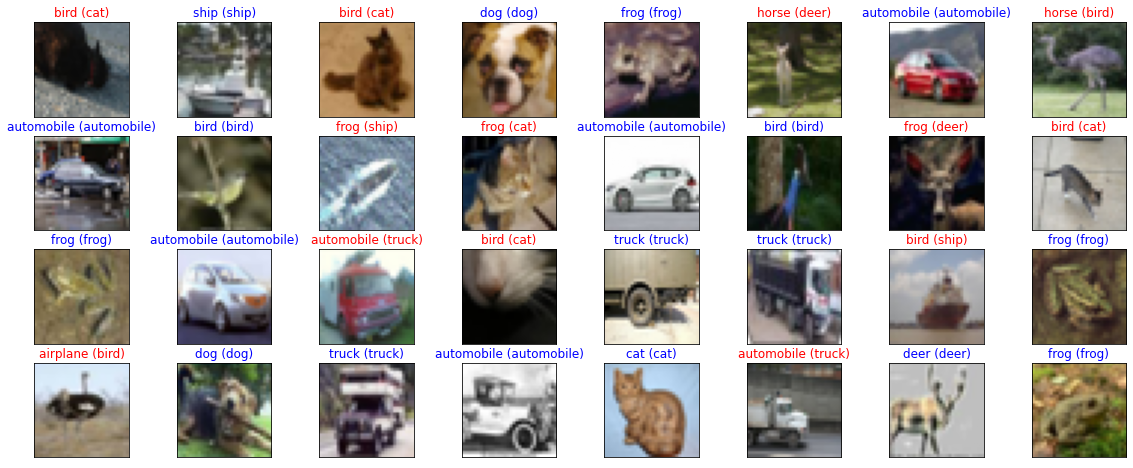

In [ ]:
import matplotlib.pyplot as plt

# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

### Architecture 2:

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 26, 26, 32)        4640      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 8, 8, 64)         

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/50
1407/1407 - 16s - loss: 1.8205 - accuracy: 0.3252 - val_loss: 1.5962 - val_accuracy: 0.4280

Epoch 00001: val_loss improved from inf to 1.59620, saving model to model.weights.best.hdf5
Epoch 2/50
1407/1407 - 15s - loss: 1.4184 - accuracy: 0.4876 - val_loss: 1.3518 - val_accuracy: 0.5122

Epoch 00002: val_loss improved from 1.59620 to 1.35185, saving model to model.weights.best.hdf5
Epoch 3/50
1407/1407 - 14s - loss: 1.2296 - accuracy: 0.5627 - val_loss: 1.3880 - val_accuracy: 0.5482

Epoch 00003: val_loss did not improve from 1.35185
Epoch 4/50
1407/1407 - 15s - loss: 1.1174 - accuracy: 0.6052 - val_loss: 1.1072 - val_accuracy: 0.6188

Epoch 00004: val_loss improved from 1.35185 to 1.10719, saving model to model.weights.best.hdf5
Epoch 5/50
1407/1407 - 15s - loss: 1.0487 - accuracy: 0.6334 - val_loss: 1.0309 - val_accuracy: 0.6402

Epoch 00005: val_loss improved from 1.10719 to 1.03088, saving model to model.weights.best.hdf5
Epoch 6/50
1407/1407 - 15s - loss: 0.9948 - accur

In [ ]:
model.load_weights('model.weights.best.hdf5')
_, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Model Accuracy: {acc*100:.4f}%')

Model Accuracy: 63.3000%


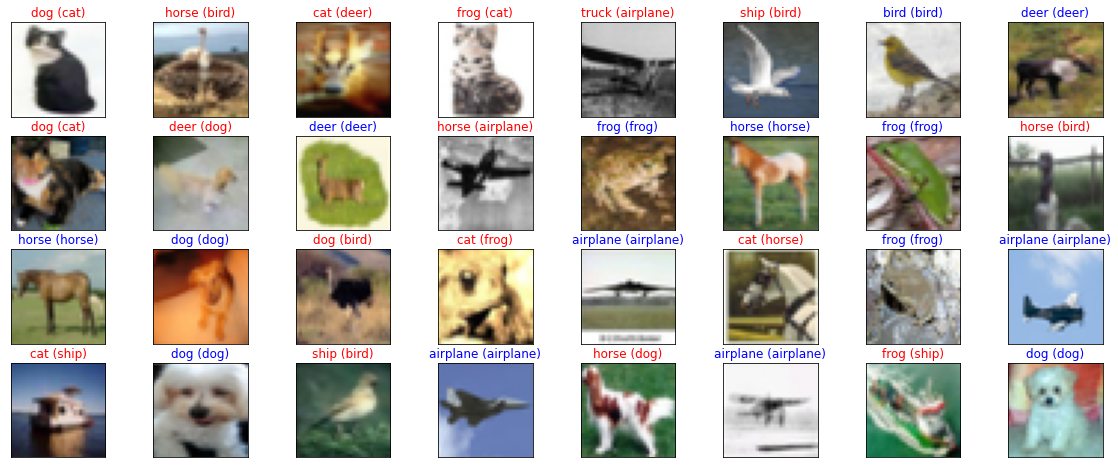

In [ ]:
import matplotlib.pyplot as plt

# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

### Architecture 3:

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 64)        1

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/50
1407/1407 - 54s - loss: 1.7978 - accuracy: 0.3308 - val_loss: 1.5460 - val_accuracy: 0.4270

Epoch 00001: val_loss improved from inf to 1.54602, saving model to model.weights.best.hdf5
Epoch 2/50
1407/1407 - 22s - loss: 1.4837 - accuracy: 0.4616 - val_loss: 1.3505 - val_accuracy: 0.5138

Epoch 00002: val_loss improved from 1.54602 to 1.35048, saving model to model.weights.best.hdf5
Epoch 3/50
1407/1407 - 22s - loss: 1.3515 - accuracy: 0.5122 - val_loss: 1.2604 - val_accuracy: 0.5440

Epoch 00003: val_loss improved from 1.35048 to 1.26039, saving model to model.weights.best.hdf5
Epoch 4/50
1407/1407 - 22s - loss: 1.2423 - accuracy: 0.5547 - val_loss: 1.1824 - val_accuracy: 0.5720

Epoch 00004: val_loss improved from 1.26039 to 1.18237, saving model to model.weights.best.hdf5
Epoch 5/50
1407/1407 - 22s - loss: 1.1444 - accuracy: 0.5889 - val_loss: 1.2086 - val_accuracy: 0.5714

Epoch 00005: val_loss did not improve from 1.18237
Epoch 6/50
1407/1407 - 22s - loss: 1.0683 - accur

In [ ]:
model.load_weights('model.weights.best.hdf5')
_, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Model Accuracy: {acc*100:.4f}%')

Model Accuracy: 60.6400%


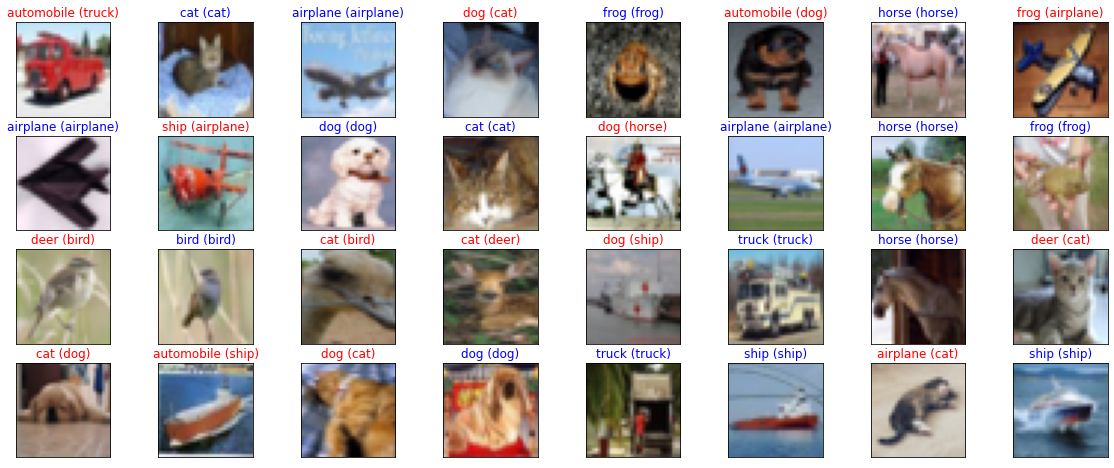

In [ ]:
import matplotlib.pyplot as plt

# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

### Architecture 4:

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 32)        4640      
_________________________________________________________________
dropout_4 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/50
1407/1407 - 25s - loss: 1.7095 - accuracy: 0.3696 - val_loss: 1.4494 - val_accuracy: 0.4666

Epoch 00001: val_loss improved from inf to 1.44937, saving model to model.weights.best.hdf5
Epoch 2/50
1407/1407 - 24s - loss: 1.4267 - accuracy: 0.4791 - val_loss: 1.3563 - val_accuracy: 0.4996

Epoch 00002: val_loss improved from 1.44937 to 1.35631, saving model to model.weights.best.hdf5
Epoch 3/50
1407/1407 - 24s - loss: 1.2883 - accuracy: 0.5363 - val_loss: 1.3609 - val_accuracy: 0.5214

Epoch 00003: val_loss did not improve from 1.35631
Epoch 4/50
1407/1407 - 24s - loss: 1.1832 - accuracy: 0.5743 - val_loss: 1.1452 - val_accuracy: 0.5834

Epoch 00004: val_loss improved from 1.35631 to 1.14521, saving model to model.weights.best.hdf5
Epoch 5/50
1407/1407 - 24s - loss: 1.0993 - accuracy: 0.6078 - val_loss: 1.1469 - val_accuracy: 0.5924

Epoch 00005: val_loss did not improve from 1.14521
Epoch 6/50
1407/1407 - 24s - loss: 1.0244 - accuracy: 0.6334 - val_loss: 1.1314 - val_accuracy

In [ ]:
model.load_weights('model.weights.best.hdf5')
_, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Model Accuracy: {acc*100:.4f}%')

Model Accuracy: 61.6700%


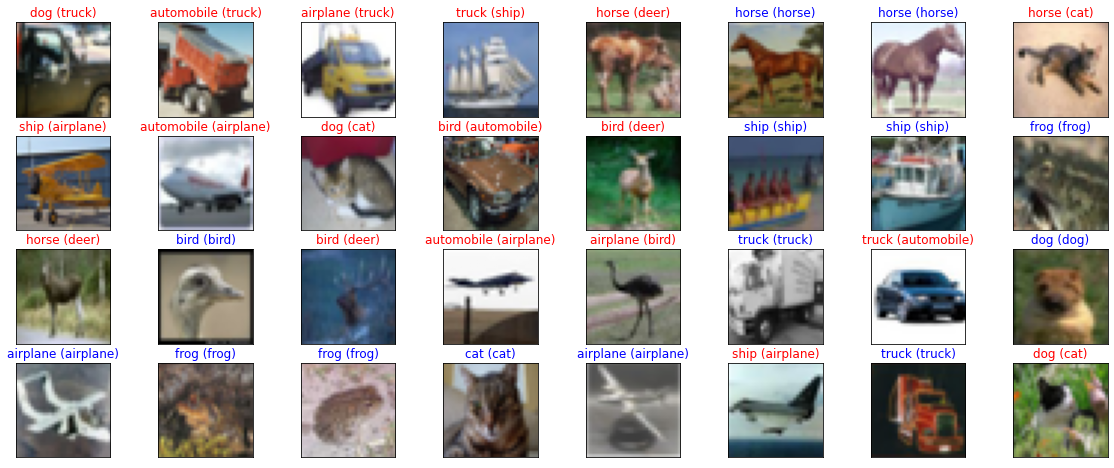

In [ ]:
import matplotlib.pyplot as plt

# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

### Architecture 5:

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 64)        1

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/50
1407/1407 - 56s - loss: 1.7195 - accuracy: 0.3570 - val_loss: 1.4498 - val_accuracy: 0.4724

Epoch 00001: val_loss improved from inf to 1.44978, saving model to model.weights.best.hdf5
Epoch 2/50
1407/1407 - 26s - loss: 1.3850 - accuracy: 0.4996 - val_loss: 1.2240 - val_accuracy: 0.5674

Epoch 00002: val_loss improved from 1.44978 to 1.22403, saving model to model.weights.best.hdf5
Epoch 3/50
1407/1407 - 25s - loss: 1.2161 - accuracy: 0.5649 - val_loss: 1.1756 - val_accuracy: 0.5832

Epoch 00003: val_loss improved from 1.22403 to 1.17561, saving model to model.weights.best.hdf5
Epoch 4/50
1407/1407 - 25s - loss: 1.0859 - accuracy: 0.6170 - val_loss: 1.0273 - val_accuracy: 0.6388

Epoch 00004: val_loss improved from 1.17561 to 1.02733, saving model to model.weights.best.hdf5
Epoch 5/50
1407/1407 - 25s - loss: 0.9684 - accuracy: 0.6584 - val_loss: 1.0321 - val_accuracy: 0.6416

Epoch 00005: val_loss did not improve from 1.02733
Epoch 6/50
1407/1407 - 25s - loss: 0.8637 - accur

In [ ]:
model.load_weights('model.weights.best.hdf5')
_, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Model Accuracy: {acc*100:.4f}%')

Model Accuracy: 64.7600%


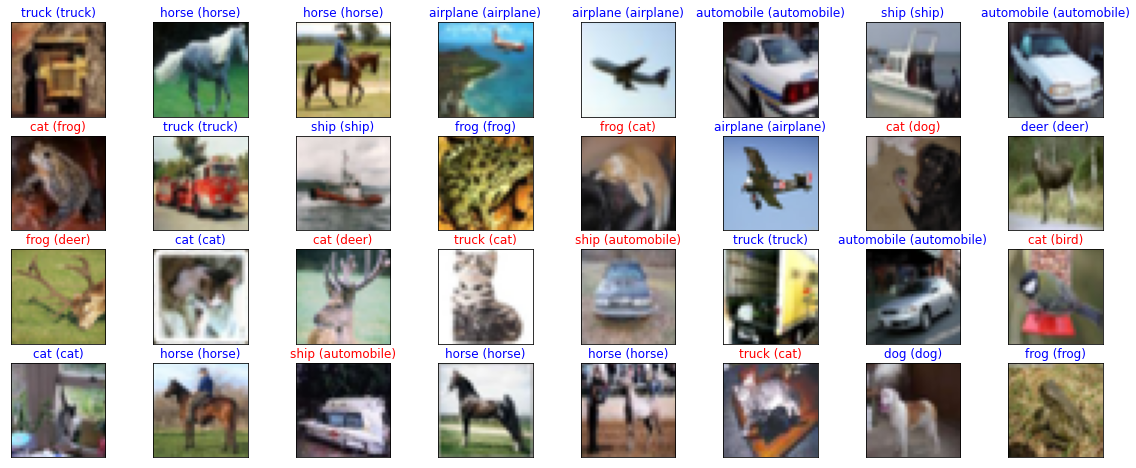

In [ ]:
import matplotlib.pyplot as plt
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

Architecture Results:

| Network Architecture | Accuracy |
|----------------------|------|
| Architecture 1       |62.73%|
| Architecture 2       |63.30%|
| Architecture 3       |60.64%|
| Architecture 4       |61.67%|
| Architecture 5       |64.76%|